/var/folders/d8/5hz75wsx04v_p4mj2t9zn3z40000gn/T/ipykernel_18645/2119448367.py:6: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('202307-citibike-tripdata.csv')


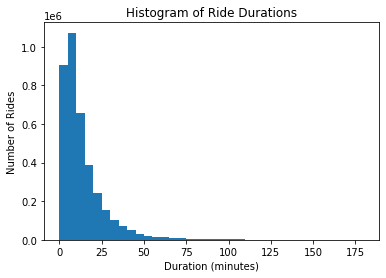

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('202307-citibike-tripdata.csv')

# Convert start and end times to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Calculate duration in minutes
df['duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Filter out rides longer than 3 hours
df = df[df['duration_min'] <= 180]

# Plot histogram of ride durations
plt.hist(df['duration_min'], bins=range(0, 181, 5))  # Bins of 5 minutes up to 3 hours
plt.title('Histogram of Ride Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Rides')
plt.show()


In [2]:
# Average ride duration
average_duration = df['duration_min'].mean()

# Empirical variance of ride duration
variance_duration = df['duration_min'].var()

# Probability that a ride duration is greater than 20 minutes
prob_over_20 = (df['duration_min'] > 20).mean()

print(f"Average ride duration: {average_duration} minutes")
print(f"Variance of ride duration: {variance_duration} minutes")
print(f"Probability that a ride is longer than 20 minutes: {prob_over_20 * 100}%")


Average ride duration: 13.643497728978591 minutes
Variance of ride duration: 213.32198235317122 minutes
Probability that a ride is longer than 20 minutes: 19.749299605740354%


In [3]:
# Filter for CitiBike members
df_members = df[df['member_casual'] == 'member']

# Probability for members
prob_over_20_members = (df_members['duration_min'] > 20).mean()

print(f"Probability that a ride is longer than 20 minutes for CitiBike members: {prob_over_20_members * 100}%")



Probability that a ride is longer than 20 minutes for CitiBike members: 15.541403239828593%


In [4]:
# Probability of being a member given the ride is more than 25min
prob_member_given_over_25 = df[df['duration_min'] > 25]['member_casual'].eq('member').mean()

print(f"Probability that a ride longer than 25 minutes belongs to a CitiBike member: {prob_member_given_over_25 * 100}%")



Probability that a ride longer than 25 minutes belongs to a CitiBike member: 57.86824806577074%


In [5]:
# Expected ride duration for electric bike
expected_duration_ebike = df[df['rideable_type'] == 'electric_bike']['duration_min'].mean()

# Expected ride duration for classic bike
expected_duration_classic = df[df['rideable_type'] == 'classic_bike']['duration_min'].mean()

print(f"Expected ride duration for an electric bike: {expected_duration_ebike} minutes")
print(f"Expected ride duration for a classic bike: {expected_duration_classic} minutes")


Expected ride duration for an electric bike: 12.275494038421913 minutes
Expected ride duration for a classic bike: 13.725188988329357 minutes


In [6]:
# Filter for rides less than 10 minutes
df_under_10 = df[df['duration_min'] < 10]

# Probability that a ride uses an electric bike for rides less than 10min
prob_ebike_under_10 = (df_under_10['rideable_type'] == 'electric_bike').mean()

# Probability that a ride uses a classic bike for rides less than 10min
prob_classic_under_10 = (df_under_10['rideable_type'] == 'classic_bike').mean()

print(f"Probability that a ride less than 10 minutes uses an electric bike: {prob_ebike_under_10 * 100}%")
print(f"Probability that a ride less than 10 minutes uses a classic bike: {prob_classic_under_10 * 100}%")

# Comment on the results after examining the outputted probabilities.


Probability that a ride less than 10 minutes uses an electric bike: 8.921412766026302%
Probability that a ride less than 10 minutes uses a classic bike: 91.01720043850601%


# Main Project

In [7]:
# Clean the data data that only focus on Weekdays

df['weekday'] = df['started_at'].dt.dayofweek
df = df[df['weekday'] < 5]

In [8]:
# Get the most number counts of stations and select the top three
df['end_station_name'].value_counts()

W 21 St & 6 Ave                      10085
West St & Chambers St                 9084
11 Ave & W 41 St                      8545
University Pl & E 14 St               8394
1 Ave & E 68 St                       8337
                                     ...  
Monmouth and 6th                         1
6 St & Grand St                          1
Hudson St & 4 St                         1
Beverley Rd & E 49 St                    1
Columbus Park - Clinton St & 9 St        1
Name: end_station_name, Length: 1947, dtype: int64

### According to the table, we will use W 21 St& 6 Ave, West St & Chambers St, 11 Ave & W 41St

In [61]:
station1 = 'W 21 St & 6 Ave'
station2 = 'West St & Chambers St'
station3 = '11 Ave & W 41 St'

### filter and split the dataset into two part, morning and evening. We assign morning to start from 6am to 12am, and  evening to start from 16pm to 22pm

In [10]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Create a filter for time
morning_time= (df['started_at'].dt.hour >= 6) & (df['started_at'].dt.hour < 12)
evening_time = (df['started_at'].dt.hour >= 16) & (df['started_at'].dt.hour < 22)

# Filter Out required data
df = df[morning_time | evening_time]

df['start_time_interval'] = df['started_at'].dt.floor('10T')
df['end_time_interval'] = df['ended_at'].dt.floor('10T')

In [11]:
#Split into morning and evening parts
morning_df = df[morning_time]
evening_df = df[evening_time]

station1_morning = morning_df[(morning_df['start_station_name'] == station1) | (morning_df['end_station_name'] == station1)]
station1_evening = evening_df[(evening_df['start_station_name'] == station1) | (evening_df['end_station_name'] == station1)]

/var/folders/d8/5hz75wsx04v_p4mj2t9zn3z40000gn/T/ipykernel_18645/205126719.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  morning_df = df[morning_time]
/var/folders/d8/5hz75wsx04v_p4mj2t9zn3z40000gn/T/ipykernel_18645/205126719.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  evening_df = df[evening_time]


### We set the time block to be 10 minutes, and count the value for different blocks and set the final_count as the number of frequency for differnt number of bicycle rentals

In [12]:
# West 21 St & 6 Ave - Morning
df_1_morning_depart = station1_morning[station1_morning['start_station_name'] == station1]['start_time_interval'].value_counts()
df_1_morning_arrive = station1_morning[station1_morning['end_station_name'] == station1]['end_time_interval'].value_counts()

station1_morning_total = pd.concat([df_1_morning_depart, df_1_morning_arrive], axis=1)
station1_morning_total.fillna(0, inplace=True)
station1_morning_total['final_count'] = station1_morning_total['end_time_interval'] - station1_morning_total['start_time_interval']
station1_morning_total['final_count'] = station1_morning_total['final_count'].astype(int)

# West 21 St & 6 Ave - Evening
df_1_evening_depart = station1_evening[station1_evening['start_station_name'] == station1]['start_time_interval'].value_counts()
df_1_evening_arrive = station1_evening[station1_evening['end_station_name'] == station1]['end_time_interval'].value_counts()

station1_evening_total = pd.concat([df_1_evening_depart, df_1_evening_arrive], axis=1)
station1_evening_total.fillna(0, inplace=True)
station1_evening_total['final_count'] = station1_evening_total['end_time_interval'] - station1_evening_total['start_time_interval']
station1_evening_total['final_count'] = station1_evening_total['final_count'].astype(int)

In [13]:
station1_morning_total

,start_time_interval,end_time_interval,final_count
2023-07-03 06:20:00,0.0,1.0,1
2023-07-03 06:30:00,1.0,0.0,-1
2023-07-03 06:40:00,1.0,2.0,1
2023-07-03 06:50:00,0.0,2.0,2
2023-07-03 07:30:00,1.0,2.0,1
...,...,...,...
2023-07-31 11:20:00,5.0,4.0,-1
2023-07-31 11:30:00,6.0,6.0,0
2023-07-31 11:40:00,3.0,1.0,-2
2023-07-31 11:50:00,0.0,6.0,6


In [14]:
station1_evening_total

,start_time_interval,end_time_interval,final_count
2023-07-03 16:00:00,7.0,3.0,-4
2023-07-03 16:10:00,9.0,5.0,-4
2023-07-03 16:20:00,12.0,1.0,-11
2023-07-03 16:30:00,3.0,3.0,0
2023-07-03 16:40:00,3.0,4.0,1
...,...,...,...
2023-07-31 21:30:00,1.0,3.0,2
2023-07-31 21:40:00,2.0,4.0,2
2023-07-31 22:00:00,0.0,1.0,1
2023-07-31 22:20:00,0.0,2.0,2


In [15]:
from collections import Counter

station1_morning_total = dict(sorted(Counter(station1_morning_total['final_count']).items()))
station1_evening_total = dict(sorted(Counter(station1_evening_total['final_count']).items()))

In [16]:
station1_morning_total

{-11: 1,
 -7: 2,
 -6: 4,
 -5: 9,
 -4: 14,
 -3: 30,
 -2: 64,
 -1: 89,
 0: 105,
 1: 136,
 2: 104,
 3: 67,
 4: 53,
 5: 32,
 6: 29,
 7: 16,
 8: 4,
 9: 6,
 10: 2,
 11: 2}

In [17]:
station1_evening_total

{-15: 2,
 -14: 2,
 -12: 6,
 -11: 3,
 -10: 6,
 -9: 5,
 -8: 15,
 -7: 12,
 -6: 29,
 -5: 38,
 -4: 45,
 -3: 59,
 -2: 91,
 -1: 85,
 0: 103,
 1: 87,
 2: 77,
 3: 31,
 4: 32,
 5: 13,
 6: 6,
 7: 6,
 8: 5,
 9: 2,
 10: 1}

### The Bike Count graph for station1 

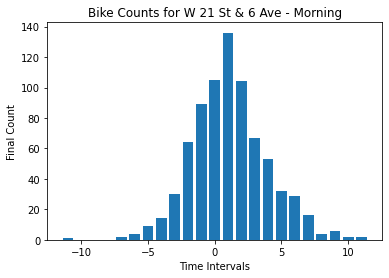

In [18]:
import matplotlib.pyplot as plt

# Assuming station_w21St6ave_dict_morning is already defined with your data
plt.bar(station1_morning_total.keys(),station1_morning_total.values())
plt.title('Bike Counts for W 21 St & 6 Ave - Morning')
plt.xlabel('Time Intervals')
plt.ylabel('Final Count')
plt.show()


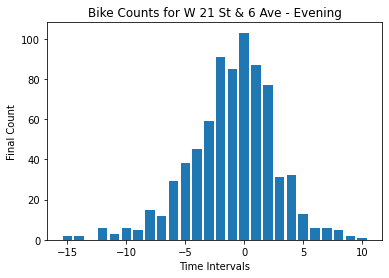

In [19]:
import matplotlib.pyplot as plt

# Assuming station_w21St6ave_dict_morning is already defined with your data
plt.bar(station1_evening_total.keys(),station1_evening_total.values())
plt.title('Bike Counts for W 21 St & 6 Ave - Evening')
plt.xlabel('Time Intervals')
plt.ylabel('Final Count')
plt.show()



### We found out that the maximum Capacity for  W 21 St & 6 Ave is 52, so we set the dock to 52, and create the transition matrix based on it. 

In [20]:
import numpy as np

# Assuming station1_dock is the number of docks at the station
# Assuming station1_morning_total and station1_evening_total are dictionaries 
# with bike changes and their frequencies for morning and evening

station1_dock = 52

# Create transition matrix for morning
morning_changes = list(station1_morning_total.keys())
morning_frequency = list(station1_morning_total.values())
w21St6ave_morning = np.zeros((station1_dock + 1, station1_dock + 1))

for i in range(w21St6ave_morning.shape[0]):
    for j in range(w21St6ave_morning.shape[1]):
        if (j - i) in morning_changes:
            w21St6ave_morning[i][j] = station1_morning_total[j - i]
    row_sum = sum(w21St6ave_morning[i])
    if row_sum != 0:
        w21St6ave_morning[i] /= row_sum

# Create transition matrix for evening
evening_changes = list(station1_evening_total.keys())
evening_frequency = list(station1_evening_total.values())
w21St6ave_evening = np.zeros((station1_dock + 1, station1_dock + 1))

for i in range(w21St6ave_evening.shape[0]):
    for j in range(w21St6ave_evening.shape[1]):
        if (j - i) in evening_changes:
            w21St6ave_evening[i][j] = station1_evening_total[j - i]
    row_sum = sum(w21St6ave_evening[i])
    if row_sum != 0:
        w21St6ave_evening[i] /= row_sum



In [21]:
w21St6ave_morning.shape
w21St6ave_evening.shape

(53, 53)

In [22]:
# Verify if the row sums equal to one for each matrix
row_sums = np.sum(w21St6ave_morning, axis=1)
np.allclose(row_sums, 1)

row_sums = np.sum(w21St6ave_evening, axis=1)
np.allclose(row_sums, 1)


True

### Transpose the transition matrix to find left eigenvectors in order to get the stationary distribution

In [23]:
import numpy as np

# Transpose the transition matrix to find left eigenvectors
transposed_matrix = np.transpose(w21St6ave_morning)

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(transposed_matrix)

# Find the index corresponding to the eigenvalue 1
index = np.where(np.isclose(eigenvalues, 1))[0][0]

# Extract the corresponding eigenvector
stationary_morning_distribution = np.real(eigenvectors[:, index])

# Normalize the stationary distribution to sum to 1
stationary_morning_distribution /= np.sum(stationary_morning_distribution)


In [24]:
import numpy as np

# Transpose the transition matrix to find left eigenvectors
transposed_matrix = np.transpose(w21St6ave_evening)

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(transposed_matrix)

# Find the index corresponding to the eigenvalue 1
index = np.where(np.isclose(eigenvalues, 1))[0][0]

# Extract the corresponding eigenvector
stationary_evening_distribution = np.real(eigenvectors[:, index])

# Normalize the stationary distribution to sum to 1
stationary_evening_distribution /= np.sum(stationary_evening_distribution)



### Plot the stationary distribution

Sum of distribution: 1.0


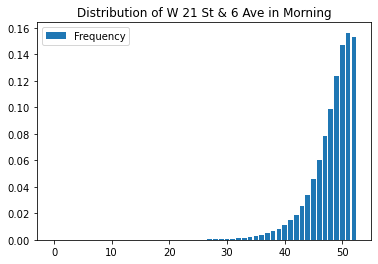

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# # Check for negative values
# if np.any(stationary_morning_distribution < 0):
#     print("Warning: Stationary distribution contains negative values.")

# Normalize to ensure all values sum to 1
stationary_morning_distribution /= np.sum(stationary_morning_distribution)

# Check the sum of the distribution to confirm it's 1
print("Sum of distribution:", np.sum(stationary_morning_distribution))

# Plot the distribution
num = range(len(stationary_morning_distribution))
plt.bar(num, stationary_morning_distribution, label='Frequency')
plt.title('Distribution of W 21 St & 6 Ave in Morning')
plt.legend()
plt.show()


Sum of distribution: 1.0


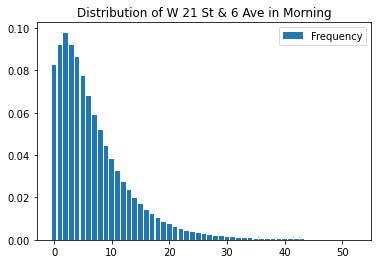

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# # Check for negative values
# if np.any(stationary_morning_distribution < 0):
#     print("Warning: Stationary distribution contains negative values.")

# Normalize to ensure all values sum to 1
stationary_evening_distribution /= np.sum(stationary_evening_distribution)

# Check the sum of the distribution to confirm it's 1
print("Sum of distribution:", np.sum(stationary_evening_distribution))

# Plot the distribution
num = range(len(stationary_evening_distribution))
plt.bar(num, stationary_evening_distribution, label='Frequency')
plt.title('Distribution of W 21 St & 6 Ave in Morning')
plt.legend()
plt.show()



### Calculate the expectation for stationary distribution

In [27]:
expectation_morning = sum(num * probability for num, probability in enumerate(stationary_morning_distribution[:station1_dock + 1]))
print(f"W 21 St & 6 Ave Morning's expectation is: {round(expectation_morning)}")

expectation_evening = sum(num * probability for num, probability in enumerate(stationary_evening_distribution[:station1_dock + 1]))
print(f"W 21 St & 6 Ave Evening's expectation is: {round(expectation_evening)}")




W 21 St & 6 Ave Morning's expectation is: 48
W 21 St & 6 Ave Evening's expectation is: 7


### We now will repeat the same process with station 2

In [28]:
station2_morning = morning_df[(morning_df['start_station_name'] == station2) | (morning_df['end_station_name'] == station2)]
station2_evening = evening_df[(evening_df['start_station_name'] == station2) | (evening_df['end_station_name'] == station2)]

### We set the time block to be 10 minutes, and count the value for different blocks and set the final_count as the number of frequency for differnt number of bicycle rentals

In [29]:
# West St & Chambers St - Morning
df_2_morning_depart = station2_morning[station2_morning['start_station_name'] == station2]['start_time_interval'].value_counts()
df_2_morning_arrive = station2_morning[station2_morning['end_station_name'] == station2]['end_time_interval'].value_counts()

station2_morning_total = pd.concat([df_2_morning_depart, df_2_morning_arrive], axis=1)
station2_morning_total.fillna(0, inplace=True)
station2_morning_total['final_count'] = station2_morning_total['end_time_interval'] - station2_morning_total['start_time_interval']
station2_morning_total['final_count'] = station2_morning_total['final_count'].astype(int)

# West St & Chambers St - Evening
df_2_evening_depart = station2_evening[station2_evening['start_station_name'] == station2]['start_time_interval'].value_counts()
df_2_evening_arrive = station2_evening[station2_evening['end_station_name'] == station2]['end_time_interval'].value_counts()

station2_evening_total = pd.concat([df_2_evening_depart, df_2_evening_arrive], axis=1)
station2_evening_total.fillna(0, inplace=True)
station2_evening_total['final_count'] = station2_evening_total['end_time_interval'] - station2_evening_total['start_time_interval']
station2_evening_total['final_count'] = station2_evening_total['final_count'].astype(int)

In [30]:
station2_morning_total

,start_time_interval,end_time_interval,final_count
2023-07-03 06:00:00,1.0,0.0,-1
2023-07-03 06:10:00,3.0,1.0,-2
2023-07-03 06:30:00,0.0,1.0,1
2023-07-03 06:40:00,0.0,1.0,1
2023-07-03 06:50:00,1.0,0.0,-1
...,...,...,...
2023-07-31 11:30:00,0.0,1.0,1
2023-07-31 11:40:00,2.0,4.0,2
2023-07-31 12:00:00,0.0,3.0,3
2023-07-31 12:10:00,0.0,2.0,2


In [31]:
station2_evening_total

,start_time_interval,end_time_interval,final_count
2023-07-03 16:00:00,5.0,0.0,-5
2023-07-03 16:10:00,6.0,1.0,-5
2023-07-03 16:20:00,3.0,6.0,3
2023-07-03 16:30:00,2.0,4.0,2
2023-07-03 16:40:00,3.0,1.0,-2
...,...,...,...
2023-07-31 21:30:00,8.0,3.0,-5
2023-07-31 21:40:00,4.0,4.0,0
2023-07-31 21:50:00,3.0,0.0,-3
2023-07-31 22:00:00,0.0,6.0,6


In [32]:
from collections import Counter
station2_morning_total = dict(sorted(Counter(station2_morning_total['final_count']).items()))
station2_evening_total = dict(sorted(Counter(station2_evening_total['final_count']).items()))

In [33]:
station2_morning_total

{-6: 2,
 -5: 7,
 -4: 13,
 -3: 29,
 -2: 59,
 -1: 122,
 0: 142,
 1: 141,
 2: 97,
 3: 58,
 4: 37,
 5: 19,
 6: 5,
 7: 6,
 8: 2,
 9: 1,
 10: 1}

In [34]:
station2_evening_total

{-15: 1,
 -13: 1,
 -12: 1,
 -11: 3,
 -10: 1,
 -9: 9,
 -8: 8,
 -7: 13,
 -6: 23,
 -5: 33,
 -4: 47,
 -3: 60,
 -2: 86,
 -1: 84,
 0: 83,
 1: 112,
 2: 74,
 3: 56,
 4: 27,
 5: 19,
 6: 18,
 7: 6,
 8: 3,
 9: 1,
 10: 2,
 11: 1,
 13: 1}

### The Bike Count graph for station2

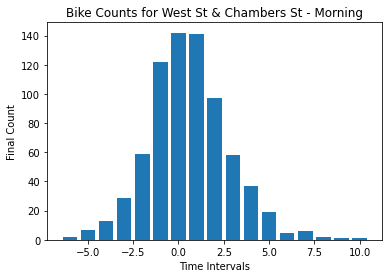

In [35]:
plt.bar(station2_morning_total.keys(),station2_morning_total.values())
plt.title('Bike Counts for West St & Chambers St - Morning')
plt.xlabel('Time Intervals')
plt.ylabel('Final Count')
plt.show()

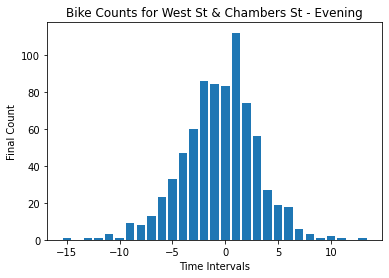

In [36]:
plt.bar(station2_evening_total.keys(),station2_evening_total.values())
plt.title('Bike Counts for West St & Chambers St - Evening')
plt.xlabel('Time Intervals')
plt.ylabel('Final Count')
plt.show()

### We found out that the maximum Capacity for  West St & Chambers St is 101, so we set the dock to 101, and create the transition matrix based on it. 

In [37]:
import numpy as np

# Assuming station2_dock is the number of docks at the station
# Assuming station2_morning_total and station2_evening_total are dictionaries 
# with bike changes and their frequencies for morning and evening

station2_dock = 101

# Create transition matrix for morning
morning_changes = list(station2_morning_total.keys())
morning_frequency = list(station2_morning_total.values())
WestStChambersSt_morning = np.zeros((station2_dock + 1, station2_dock + 1))

for i in range(WestStChambersSt_morning.shape[0]):
    for j in range(WestStChambersSt_morning.shape[1]):
        if (j - i) in morning_changes:
            WestStChambersSt_morning[i][j] = station2_morning_total[j - i]
    row_sum = sum(WestStChambersSt_morning[i])
    if row_sum != 0:
        WestStChambersSt_morning[i] /= row_sum

# Create transition matrix for evening
evening_changes = list(station2_evening_total.keys())
evening_frequency = list(station2_evening_total.values())
WestStChambersSt_evening = np.zeros((station2_dock + 1, station2_dock + 1))

for i in range(WestStChambersSt_evening.shape[0]):
    for j in range(WestStChambersSt_evening.shape[1]):
        if (j - i) in evening_changes:
            WestStChambersSt_evening[i][j] = station2_evening_total[j - i]
    row_sum = sum(WestStChambersSt_evening[i])
    if row_sum != 0:
        WestStChambersSt_evening[i] /= row_sum

In [38]:
WestStChambersSt_morning.shape
WestStChambersSt_evening.shape

(102, 102)

In [39]:
# Verify if the row sums equal to one for each matrix
row_sums = np.sum(WestStChambersSt_morning, axis=1)
np.allclose(row_sums, 1)

row_sums = np.sum(WestStChambersSt_evening, axis=1)
np.allclose(row_sums, 1)

True

### Transpose the transition matrix to find left eigenvectors in order to get the stationary distribution

In [40]:
import numpy as np

# Transpose the transition matrix to find left eigenvectors
transposed_matrix = np.transpose(WestStChambersSt_morning)

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(transposed_matrix)

# Find the index corresponding to the eigenvalue 1
index = np.where(np.isclose(eigenvalues, 1))[0][0]

# Extract the corresponding eigenvector
stationary_morning_distribution = np.real(eigenvectors[:, index])

# Normalize the stationary distribution to sum to 1
stationary_morning_distribution /= np.sum(stationary_morning_distribution)

In [41]:
import numpy as np

# Transpose the transition matrix to find left eigenvectors
transposed_matrix = np.transpose(WestStChambersSt_evening)

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(transposed_matrix)

# Find the index corresponding to the eigenvalue 1
index = np.where(np.isclose(eigenvalues, 1))[0][0]

# Extract the corresponding eigenvector
stationary_evening_distribution = np.real(eigenvectors[:, index])

# Normalize the stationary distribution to sum to 1
stationary_evening_distribution /= np.sum(stationary_evening_distribution)



### Plot the stationary distribution

Sum of distribution: 1.0


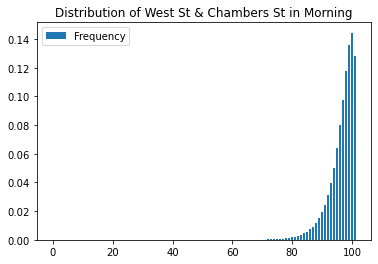

In [42]:
# # Check for negative values
# if np.any(stationary_morning_distribution < 0):
#     print("Warning: Stationary distribution contains negative values.")

# Normalize to ensure all values sum to 1
stationary_morning_distribution /= np.sum(stationary_morning_distribution)

# Check the sum of the distribution to confirm it's 1
print("Sum of distribution:", np.sum(stationary_morning_distribution))

# Plot the distribution
num = range(len(stationary_morning_distribution))
plt.bar(num, stationary_morning_distribution, label='Frequency')
plt.title('Distribution of West St & Chambers St in Morning')
plt.legend()
plt.show()


Sum of distribution: 1.0


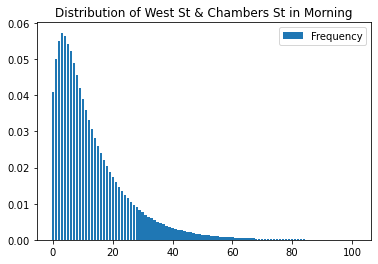

In [43]:
# # Check for negative values
# if np.any(stationary_morning_distribution < 0):
#     print("Warning: Stationary distribution contains negative values.")

# Normalize to ensure all values sum to 1
stationary_evening_distribution /= np.sum(stationary_evening_distribution)

# Check the sum of the distribution to confirm it's 1
print("Sum of distribution:", np.sum(stationary_evening_distribution))

# Plot the distribution
num = range(len(stationary_evening_distribution))
plt.bar(num, stationary_evening_distribution, label='Frequency')
plt.title('Distribution of West St & Chambers St in Morning')
plt.legend()
plt.show()



In [44]:
expectation_morning = sum(num * probability for num, probability in enumerate(stationary_morning_distribution[:station2_dock + 1]))
print(f"West St & Chambers St Morning's expectation is: {round(expectation_morning)}")

expectation_evening = sum(num * probability for num, probability in enumerate(stationary_evening_distribution[:station2_dock + 1]))
print(f"West St & Chambers St Evening's expectation is: {round(expectation_evening)}")


West St & Chambers St Morning's expectation is: 97
West St & Chambers St Evening's expectation is: 13


### We now will repeat the same process with station 3

In [62]:
station3_morning = morning_df[(morning_df['start_station_name'] == station3) | (morning_df['end_station_name'] == station3)]
station3_evening = evening_df[(evening_df['start_station_name'] == station3) | (evening_df['end_station_name'] == station3)]

### We set the time block to be 10 minutes, and count the value for different blocks and set the final_count as the number of frequency for differnt number of bicycle rentals

In [63]:
# 11 Ave & W 41St - Morning
df_3_morning_depart = station3_morning[station3_morning['start_station_name'] == station3]['start_time_interval'].value_counts()
df_3_morning_arrive = station3_morning[station3_morning['end_station_name'] == station3]['end_time_interval'].value_counts()

station3_morning_total = pd.concat([df_3_morning_depart, df_3_morning_arrive], axis=1)
station3_morning_total.fillna(0, inplace=True)
station3_morning_total['final_count'] = station3_morning_total['end_time_interval'] - station3_morning_total['start_time_interval']
station3_morning_total['final_count'] = station3_morning_total['final_count'].astype(int)

# 11 Ave & W 41St - Evening
df_3_evening_depart = station3_evening[station3_evening['start_station_name'] == station3]['start_time_interval'].value_counts()
df_3_evening_arrive = station3_evening[station3_evening['end_station_name'] == station3]['end_time_interval'].value_counts()

station3_evening_total = pd.concat([df_3_evening_depart, df_3_evening_arrive], axis=1)
station3_evening_total.fillna(0, inplace=True)
station3_evening_total['final_count'] = station3_evening_total['end_time_interval'] - station3_evening_total['start_time_interval']
station3_evening_total['final_count'] = station3_evening_total['final_count'].astype(int)

In [64]:
station3_morning_total

,start_time_interval,end_time_interval,final_count
2023-07-03 06:00:00,2.0,2.0,0
2023-07-03 06:10:00,6.0,2.0,-4
2023-07-03 06:20:00,2.0,0.0,-2
2023-07-03 06:40:00,3.0,2.0,-1
2023-07-03 06:50:00,2.0,0.0,-2
...,...,...,...
2023-07-31 11:10:00,1.0,3.0,2
2023-07-31 11:20:00,2.0,2.0,0
2023-07-31 11:30:00,2.0,0.0,-2
2023-07-31 11:40:00,0.0,1.0,1


In [65]:
station3_evening_total

,start_time_interval,end_time_interval,final_count
2023-07-03 16:00:00,2.0,0.0,-2
2023-07-03 16:10:00,3.0,1.0,-2
2023-07-03 16:20:00,4.0,2.0,-2
2023-07-03 16:30:00,5.0,3.0,-2
2023-07-03 16:40:00,1.0,4.0,3
...,...,...,...
2023-07-31 21:30:00,4.0,1.0,-3
2023-07-31 21:40:00,1.0,3.0,2
2023-07-31 21:50:00,6.0,4.0,-2
2023-07-31 22:00:00,0.0,2.0,2


In [66]:
station3_morning_total = dict(sorted(Counter(station3_morning_total['final_count']).items()))
station3_evening_total = dict(sorted(Counter(station3_evening_total['final_count']).items()))

In [67]:
station3_morning_total

{-11: 2,
 -10: 3,
 -9: 2,
 -8: 6,
 -7: 11,
 -6: 20,
 -5: 28,
 -4: 39,
 -3: 65,
 -2: 108,
 -1: 138,
 0: 138,
 1: 109,
 2: 60,
 3: 17,
 4: 7,
 5: 2,
 7: 1}

In [68]:
station3_evening_total

{-12: 1,
 -11: 2,
 -9: 2,
 -8: 5,
 -7: 8,
 -6: 5,
 -5: 16,
 -4: 32,
 -3: 44,
 -2: 67,
 -1: 94,
 0: 117,
 1: 122,
 2: 87,
 3: 47,
 4: 36,
 5: 27,
 6: 28,
 7: 20,
 8: 14,
 9: 7,
 10: 6,
 11: 1,
 12: 3,
 13: 1}

### The Bike Count graph for station3

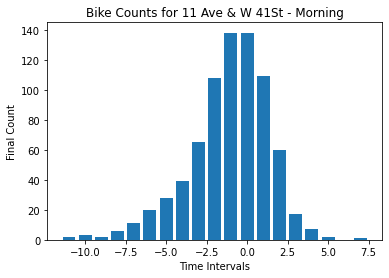

In [69]:
plt.bar(station3_morning_total.keys(),station3_morning_total.values())
plt.title('Bike Counts for 11 Ave & W 41St - Morning')
plt.xlabel('Time Intervals')
plt.ylabel('Final Count')
plt.show()

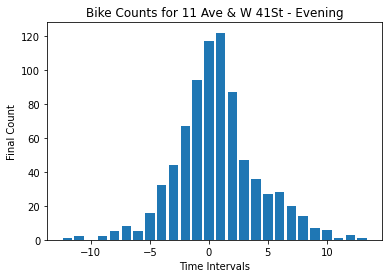

In [70]:
plt.bar(station3_evening_total.keys(),station3_evening_total.values())
plt.title('Bike Counts for 11 Ave & W 41St - Evening')
plt.xlabel('Time Intervals')
plt.ylabel('Final Count')
plt.show()

### We found out that the maximum Capacity for  11 Ave & W 41St is 46, so we set the dock to 46, and create the transition matrix based on it. 

In [71]:
# Assuming station3_dock is the number of docks at the station
# Assuming station3_morning_total and station3_evening_total are dictionaries 
# with bike changes and their frequencies for morning and evening

station3_dock = 46

# Create transition matrix for morning
morning_changes = list(station3_morning_total.keys())
morning_frequency = list(station3_morning_total.values())
AveW41St_morning= np.zeros((station3_dock + 1, station3_dock + 1))

for i in range(AveW41St_morning.shape[0]):
    for j in range(AveW41St_morning.shape[1]):
        if (j - i) in morning_changes:
            AveW41St_morning[i][j] = station3_morning_total[j - i]
    row_sum = sum(AveW41St_morning[i])
    if row_sum != 0:
        AveW41St_morning[i] /= row_sum

# Create transition matrix for evening
evening_changes = list(station3_evening_total.keys())
evening_frequency = list(station3_evening_total.values())
AveW41St_evening = np.zeros((station3_dock + 1, station3_dock + 1))

for i in range(AveW41St_evening.shape[0]):
    for j in range(AveW41St_evening.shape[1]):
        if (j - i) in evening_changes:
            AveW41St_evening[i][j] = station3_evening_total[j - i]
    row_sum = sum(AveW41St_evening[i])
    if row_sum != 0:
        AveW41St_evening[i] /= row_sum



In [72]:
AveW41St_morning.shape
AveW41St_evening.shape

(47, 47)

In [73]:
# Verify if the row sums equal to one for each matrix
row_sums = np.sum(AveW41St_morning, axis=1)
np.allclose(row_sums, 1)

row_sums = np.sum(AveW41St_evening, axis=1)
np.allclose(row_sums, 1)

True

### Transpose the transition matrix to find left eigenvectors in order to get the stationary distribution

In [74]:
# Transpose the transition matrix to find left eigenvectors
transposed_matrix = np.transpose(AveW41St_morning)

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(transposed_matrix)

# Find the index corresponding to the eigenvalue 1
index = np.where(np.isclose(eigenvalues, 1))[0][0]

# Extract the corresponding eigenvector
stationary_morning_distribution = np.real(eigenvectors[:, index])

# Normalize the stationary distribution to sum to 1
stationary_morning_distribution /= np.sum(stationary_morning_distribution)


In [75]:

# Transpose the transition matrix to find left eigenvectors
transposed_matrix = np.transpose(AveW41St_evening)

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(transposed_matrix)

# Find the index corresponding to the eigenvalue 1
index = np.where(np.isclose(eigenvalues, 1))[0][0]

# Extract the corresponding eigenvector
stationary_evening_distribution = np.real(eigenvectors[:, index])

# Normalize the stationary distribution to sum to 1
stationary_evening_distribution /= np.sum(stationary_evening_distribution)



### Plot the stationary distribution

Sum of distribution: 1.0


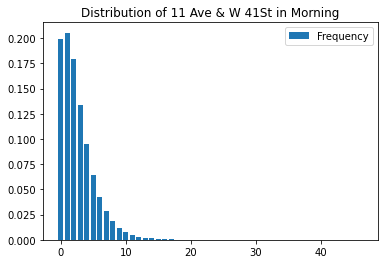

In [76]:
# # Check for negative values
# if np.any(stationary_morning_distribution < 0):
#     print("Warning: Stationary distribution contains negative values.")

# Normalize to ensure all values sum to 1
stationary_morning_distribution /= np.sum(stationary_morning_distribution)

# Check the sum of the distribution to confirm it's 1
print("Sum of distribution:", np.sum(stationary_morning_distribution))

# Plot the distribution
num = range(len(stationary_morning_distribution))
plt.bar(num, stationary_morning_distribution, label='Frequency')
plt.title('Distribution of 11 Ave & W 41St in Morning')
plt.legend()
plt.show()

Sum of distribution: 1.0


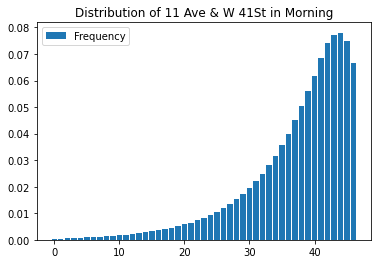

In [77]:
# # Check for negative values
# if np.any(stationary_morning_distribution < 0):
#     print("Warning: Stationary distribution contains negative values.")

# Normalize to ensure all values sum to 1
stationary_evening_distribution /= np.sum(stationary_evening_distribution)

# Check the sum of the distribution to confirm it's 1
print("Sum of distribution:", np.sum(stationary_evening_distribution))

# Plot the distribution
num = range(len(stationary_evening_distribution))
plt.bar(num, stationary_evening_distribution, label='Frequency')
plt.title('Distribution of 11 Ave & W 41St in Morning')
plt.legend()
plt.show()


In [78]:
expectation_morning = sum(num * probability for num, probability in enumerate(stationary_morning_distribution[:station3_dock + 1]))
print(f"11 Ave & W 41St Morning's expectation is: {round(expectation_morning)}")

expectation_evening = sum(num * probability for num, probability in enumerate(stationary_evening_distribution[:station3_dock + 1]))
print(f"11 Ave & W 41St Evening's expectation is: {round(expectation_evening)}")



11 Ave & W 41St Morning's expectation is: 3
11 Ave & W 41St Evening's expectation is: 37


Based on the results, the project shows that there are 48 bikes available at the end of the morning for the ”W 21 St & 6 Ave” station, and 7 bikes available at the end of the evening in the long term. One possible reason for such significant difference during the weekdays could be that this station is in a commerical area in New York city and that the flow differs a lot since people might ride to the station in the morning and ride back from station to home at night. This finding possibly indicates Citibikes to increase the number of available bikes at this station during the night in case it fails to satisfy the demand.

For "West st&Chamber st", it is a similar case to "W 21 st&6 Ave" as there is a significant difference between the expected number of bikes at the station at the end of the morning and evening. It also yields similar suggestion to Citibikes that there might exists the need to increase the number of bikes at this station during the night.

The statistics for "11 Ave&W 41 st" is the opposite to the preivous two stations as there is 3 available bikes at the end of the morning and 37 at the end of the evening. Such difference possibly infers that this station, instead of being a commerical area, is a residential area and people ride out to work from this station in the morning and ride home in the evening. This would then informs Citibikes to increase the number of bikes at this station in the morning in case people don't have enough bikes to ride to work. 